# Wk18-Lecture01-CodeAlong: Preparing Time Series Data

## Learning Objectives

- By the end of this CodeAlong, students will be able to:
    - Create date time indices
    - Resample at various frequencies
    - Impute null values for time series 
    - Convert wide-form data to long-form
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

In [3]:
crypto = pd.read_csv("Data/stocks/wide-form-crypto.csv")
crypto

,CryptoCurrency,Symbol,Currency,2014-09-17,2014-09-18,2014-09-19,2014-09-20,2014-09-21,2014-09-22,2014-09-23,...,2023-01-17,2023-01-18,2023-01-19,2023-01-20,2023-01-21,2023-01-22,2023-01-23,2023-01-24,2023-01-25,2023-01-26
0,Bitcoin,BTC-USD,BTC,457.33,424.44,394.80,408.90,398.82,402.15,435.79,...,"21,161.52","20,688.78","21,086.79","22,676.55","22,777.62","22,720.42","22,934.43","22,636.47","23,117.86","23,032.78"
1,Etherium,ETH-USD,ETH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,567.85","1,515.51","1,552.56","1,659.75","1,627.12","1,628.38","1,628.25","1,556.60","1,611.71","1,603.11"
2,Dogecoin,DOGE-USD,DOGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08,0.08,0.08,0.09,0.08,0.09,0.09,0.08,0.09,0.09


# Working with Wide-Form Time Series Data (Regular Intervals)

## <font color='blue'> Step 1 </font>: Convert datetime to One Column

In [4]:
## First columns are id columns
id_vars = crypto.columns[:3]
id_vars

Index(['CryptoCurrency', 'Symbol', 'Currency'], dtype='object')

In [5]:
## Melt the crypto data 
long_crypto = pd.melt(crypto, id_vars=id_vars, var_name='Date', value_name='Price')
long_crypto

,CryptoCurrency,Symbol,Currency,Date,Price
0,Bitcoin,BTC-USD,BTC,2014-09-17,457.33
1,Etherium,ETH-USD,ETH,2014-09-17,NaN
2,Dogecoin,DOGE-USD,DOGE,2014-09-17,NaN
3,Bitcoin,BTC-USD,BTC,2014-09-18,424.44
4,Etherium,ETH-USD,ETH,2014-09-18,NaN
...,...,...,...,...,...
9157,Etherium,ETH-USD,ETH,2023-01-25,"1,611.71"
9158,Dogecoin,DOGE-USD,DOGE,2023-01-25,0.09
9159,Bitcoin,BTC-USD,BTC,2023-01-26,"23,032.78"
9160,Etherium,ETH-USD,ETH,2023-01-26,"1,603.11"


## <font color='blue'> Step 2: </font> Convert Datetime column to <font color='green'> datetime </font> type with <font color='green'> pd.to_datetime </font>

## Using pd.to_datetime with strftime codes!

- Datetime objects have a `.strftime()` method (string-format-time)

- 📖 **strftime cheat sheet: https://strftime.org/**
- 📖 **Official Table of Python datetime format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes **


| Directive   | Meaning                                                                                                                                                                          | Example                                                                      |
|:------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------|
| %a          | Weekday as locale’s abbreviated name.                                                                                                                                            | Sun, Mon, …, Sat (en_US); So, Mo, …, Sa (de_DE)                              |
| %A          | Weekday as locale’s full name.                                                                                                                                                   | Sunday, Monday, …, Saturday (en_US); Sonntag, Montag, …, Samstag (de_DE)     |
| %w          | Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.                                                                                                                | 0, 1, …, 6                                                                   |
| %d          | Day of the month as a zero-padded decimal number.                                                                                                                                | 01, 02, …, 31                                                                |
| %b          | Month as locale’s abbreviated name.                                                                                                                                              | Jan, Feb, …, Dec (en_US); Jan, Feb, …, Dez (de_DE)                           |
| %B          | Month as locale’s full name.                                                                                                                                                     | January, February, …, December (en_US); Januar, Februar, …, Dezember (de_DE) |
| %m          | Month as a zero-padded decimal number.                                                                                                                                           | 01, 02, …, 12                                                                |
| %y          | Year without century as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 99                                                                |
| %Y          | Year with century as a decimal number.                                                                                                                                           | 0001, 0002, …, 2013, 2014, …, 9998, 9999                                     |
| %H          | Hour (24-hour clock) as a zero-padded decimal number.                                                                                                                            | 00, 01, …, 23                                                                |
| %I          | Hour (12-hour clock) as a zero-padded decimal number.                                                                                                                            | 01, 02, …, 12                                                                |
| %p          | Locale’s equivalent of either AM or PM.                                                                                                                                          | AM, PM (en_US); am, pm (de_DE)                                               |
| %M          | Minute as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %S          | Second as a zero-padded decimal number.                                                                                                                                          | 00, 01, …, 59                                                                |
| %f          | Microsecond as a decimal number, zero-padded to 6 digits.                                                                                                                        | 000000, 000001, …, 999999                                                    |
| %z          | UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).                                                                                                 | (empty), +0000, -0400, +1030, +063415, -030712.345216                        |
| %Z          | Time zone name (empty string if the object is naive).                                                                                                                            | (empty), UTC, GMT                                                            |
| %j          | Day of the year as a zero-padded decimal number.                                                                                                                                 | 001, 002, …, 366                                                             |
| %U          | Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %W          | Week number of the year (Monday as the first day of the week) as a zero-padded decimal number. All days in a new year preceding the first Monday are considered to be in week 0. | 00, 01, …, 53                                                                |
| %c          | Locale’s appropriate date and time representation.                                                                                                                               | Tue Aug 16 21:30:00 1988 (en_US); Di 16 Aug 21:30:00 1988 (de_DE)            |
| %x          | Locale’s appropriate date representation.                                                                                                                                        | 08/16/88 (None); 08/16/1988 (en_US); 16.08.1988 (de_DE)                      |
| %X          | Locale’s appropriate time representation.                                                                                                                                        | 21:30:00 (en_US); 21:30:00 (de_DE)                                           |
| %%          | A literal '%' character.                                                                                                                                                         | %                                                                            |

In [6]:
long_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9162 entries, 0 to 9161
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CryptoCurrency  9162 non-null   object 
 1   Symbol          9162 non-null   object 
 2   Currency        9162 non-null   object 
 3   Date            9162 non-null   object 
 4   Price           6864 non-null   float64
dtypes: float64(1), object(4)
memory usage: 358.0+ KB


In [7]:
## Compare to dates in dataframe
long_crypto['Date'][0]

'2014-09-17'

In [8]:
## Creating/testing our time format
import datetime
today_datetime = datetime.datetime.today()

fmt = "%Y-%m-%d"
today_datetime.strftime(fmt)

'2023-10-23'

- We can speed up the conversion by specifying the correct time format and setting `infer_datetime_format=False`

In [9]:
## Use the fmt to convert datetime type
long_crypto['Date'] = pd.to_datetime(long_crypto['Date'], format=fmt)
long_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9162 entries, 0 to 9161
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CryptoCurrency  9162 non-null   object        
 1   Symbol          9162 non-null   object        
 2   Currency        9162 non-null   object        
 3   Date            9162 non-null   datetime64[ns]
 4   Price           6864 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 358.0+ KB


## <font color='blue'> Step 3: </font> Set datetime as Index

In [10]:
## Set Date as index
long_crypto = long_crypto.set_index('Date')
long_crypto

,CryptoCurrency,Symbol,Currency,Price
Date,,,,
2014-09-17,Bitcoin,BTC-USD,BTC,457.33
2014-09-17,Etherium,ETH-USD,ETH,NaN
2014-09-17,Dogecoin,DOGE-USD,DOGE,NaN
2014-09-18,Bitcoin,BTC-USD,BTC,424.44
2014-09-18,Etherium,ETH-USD,ETH,NaN
...,...,...,...,...
2023-01-25,Etherium,ETH-USD,ETH,"1,611.71"
2023-01-25,Dogecoin,DOGE-USD,DOGE,0.09
2023-01-26,Bitcoin,BTC-USD,BTC,"23,032.78"


In [3]:
## Check index


## Example Slicing with Datetime Index <font color='red'> Super Powers!

In [11]:
## Slice One Year:
long_crypto.loc['2020']

,CryptoCurrency,Symbol,Currency,Price
Date,,,,
2020-01-01,Bitcoin,BTC-USD,BTC,"7,200.17"
2020-01-01,Etherium,ETH-USD,ETH,130.80
2020-01-01,Dogecoin,DOGE-USD,DOGE,0.00
2020-01-02,Bitcoin,BTC-USD,BTC,"6,985.47"
2020-01-02,Etherium,ETH-USD,ETH,127.41
...,...,...,...,...
2020-12-30,Etherium,ETH-USD,ETH,751.62
2020-12-30,Dogecoin,DOGE-USD,DOGE,0.00
2020-12-31,Bitcoin,BTC-USD,BTC,"29,001.72"


In [14]:
## Slice One Month
long_crypto.loc['3/2019']

,CryptoCurrency,Symbol,Currency,Price
Date,,,,
2019-03-01,Bitcoin,BTC-USD,BTC,"3,859.58"
2019-03-01,Etherium,ETH-USD,ETH,136.44
2019-03-01,Dogecoin,DOGE-USD,DOGE,0.00
2019-03-02,Bitcoin,BTC-USD,BTC,"3,864.42"
2019-03-02,Etherium,ETH-USD,ETH,134.21
...,...,...,...,...
2019-03-30,Etherium,ETH-USD,ETH,142.09
2019-03-30,Dogecoin,DOGE-USD,DOGE,0.00
2019-03-31,Bitcoin,BTC-USD,BTC,"4,105.40"


In [15]:
## Slice One day and two columns
long_crypto.loc['2020', 'Price']

Date
2020-01-01    7,200.17
2020-01-01      130.80
2020-01-01        0.00
2020-01-02    6,985.47
2020-01-02      127.41
                ...   
2020-12-30      751.62
2020-12-30        0.00
2020-12-31   29,001.72
2020-12-31      737.80
2020-12-31        0.00
Name: Price, Length: 1098, dtype: float64

In [18]:
## Slice Range of Dates
long_crypto.loc['10/23/2020']

,CryptoCurrency,Symbol,Currency,Price
Date,,,,
2020-10-23,Bitcoin,BTC-USD,BTC,"12,931.54"
2020-10-23,Etherium,ETH-USD,ETH,409.77
2020-10-23,Dogecoin,DOGE-USD,DOGE,0.00


## <font color='blue'> Step 4: </font> Resample to Desired Frequency

### Pandas Frequency Codes

![pandas frequency codes](../pandas_freq_cheatsheet.png)

In [19]:
long_crypto.index

DatetimeIndex(['2014-09-17', '2014-09-17', '2014-09-17', '2014-09-18',
               '2014-09-18', '2014-09-18', '2014-09-19', '2014-09-19',
               '2014-09-19', '2014-09-20',
               ...
               '2023-01-23', '2023-01-24', '2023-01-24', '2023-01-24',
               '2023-01-25', '2023-01-25', '2023-01-25', '2023-01-26',
               '2023-01-26', '2023-01-26'],
              dtype='datetime64[ns]', name='Date', length=9162, freq=None)

### Grouping and resampling in one step!

In [21]:
# Group by currency and resample as daily. Keep only 'Value' column
crypto_ts = long_crypto.groupby('Currency').resample('D').last()['Price']
crypto_ts

Currency  Date      
BTC       2014-09-17     457.33
          2014-09-18     424.44
          2014-09-19     394.80
          2014-09-20     408.90
          2014-09-21     398.82
                         ...   
ETH       2023-01-22   1,628.38
          2023-01-23   1,628.25
          2023-01-24   1,556.60
          2023-01-25   1,611.71
          2023-01-26   1,603.11
Name: Price, Length: 9162, dtype: float64

In [22]:
## Check type
type(crypto_ts)

pandas.core.series.Series

In [23]:
## Check index
crypto_ts.index

MultiIndex([('BTC', '2014-09-17'),
            ('BTC', '2014-09-18'),
            ('BTC', '2014-09-19'),
            ('BTC', '2014-09-20'),
            ('BTC', '2014-09-21'),
            ('BTC', '2014-09-22'),
            ('BTC', '2014-09-23'),
            ('BTC', '2014-09-24'),
            ('BTC', '2014-09-25'),
            ('BTC', '2014-09-26'),
            ...
            ('ETH', '2023-01-17'),
            ('ETH', '2023-01-18'),
            ('ETH', '2023-01-19'),
            ('ETH', '2023-01-20'),
            ('ETH', '2023-01-21'),
            ('ETH', '2023-01-22'),
            ('ETH', '2023-01-23'),
            ('ETH', '2023-01-24'),
            ('ETH', '2023-01-25'),
            ('ETH', '2023-01-26')],
           names=['Currency', 'Date'], length=9162)

<Axes: xlabel='Currency,Date'>

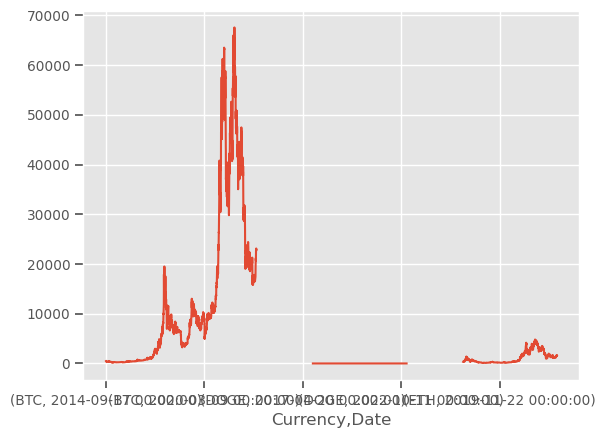

In [24]:
## Plot data
crypto_ts.plot()

> What are we seeing?

In [ ]:
## Check data again


In [26]:
## Unstack the data
crypto_unstacked = crypto_ts.unstack(0)
crypto_unstacked

Currency,BTC,DOGE,ETH
Date,,,
2014-09-17,457.33,NaN,NaN
2014-09-18,424.44,NaN,NaN
2014-09-19,394.80,NaN,NaN
2014-09-20,408.90,NaN,NaN
2014-09-21,398.82,NaN,NaN
...,...,...,...
2023-01-22,"22,720.42",0.09,"1,628.38"
2023-01-23,"22,934.43",0.09,"1,628.25"
2023-01-24,"22,636.47",0.08,"1,556.60"


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

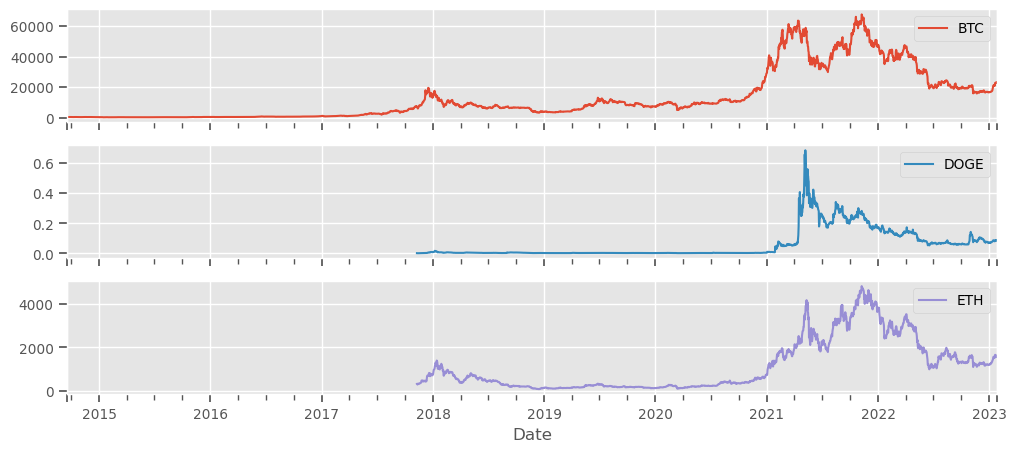

In [34]:
## Plot unstacked data
crypto_unstacked.plot(subplots=True)

# Changing matplotlib default plot size

In [31]:
## Check current Default
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [32]:
## Change default to be wider
plt.rcParams['figure.figsize'] = [12,5]

<Axes: xlabel='Date'>

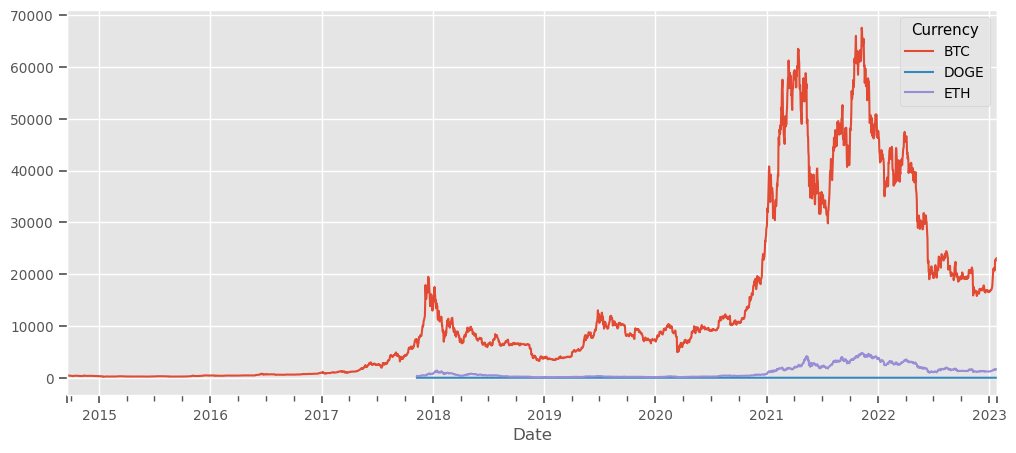

In [33]:
## Try plotting again
crypto_unstacked.plot()

## Selecting our TS for Resampling Demonstration

We are going to clice out the data for `Bitcoin` during 2021 and 2022

In [36]:
## Slice out 2021 and 2022 Bitcoin data
ts = crypto_unstacked.loc['2021':'2022', 'BTC'].copy()
ts

Date
2021-01-01   29,374.15
2021-01-02   32,127.27
2021-01-03   32,782.02
2021-01-04   31,971.91
2021-01-05   33,992.43
                ...   
2022-12-27   16,717.17
2022-12-28   16,552.57
2022-12-29   16,642.34
2022-12-30   16,602.59
2022-12-31   16,547.50
Freq: D, Name: BTC, Length: 730, dtype: float64

<Axes: xlabel='Date'>

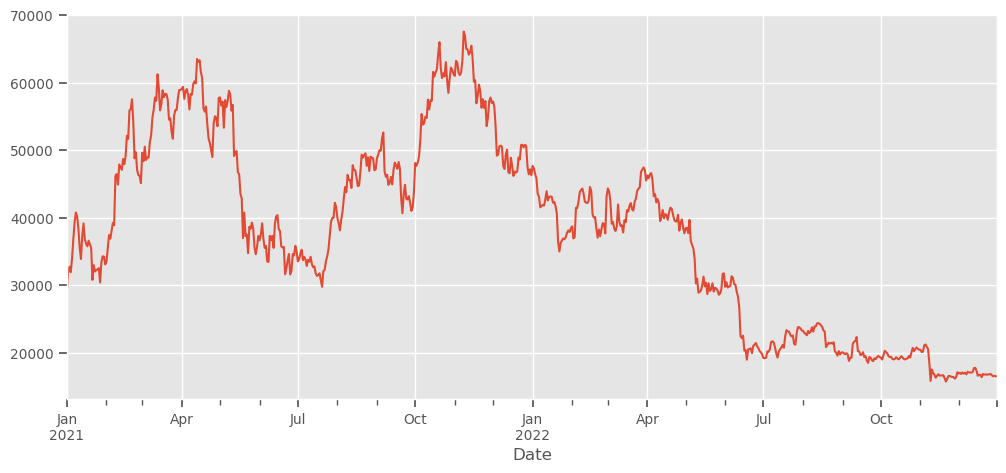

In [37]:
## Plot new ts data
ts.plot()

## Resampling

In [38]:
## Check the index to confirm the current freq
ts.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', length=730, freq='D')

>It looks like we have minute-resolution data (frequency = minutes).

### Resample as Weeks Frequency

In [41]:
## Resample as weekly using correct freq code and use .asfreq as agg emthod
ts_W = ts.resample('W').last()
ts_W

Date
2021-01-03   32,782.02
2021-01-10   38,356.44
2021-01-17   35,791.28
2021-01-24   32,289.38
2021-01-31   33,114.36
                ...   
2022-12-04   17,130.49
2022-12-11   17,104.19
2022-12-18   16,757.98
2022-12-25   16,841.99
2023-01-01   16,547.50
Freq: W-SUN, Name: BTC, Length: 105, dtype: float64

In [ ]:
## Check index for frequency


In [ ]:
## Plot the weekly data


### Let's resample and plot our ts as daily, weekly, and monthly to compare.

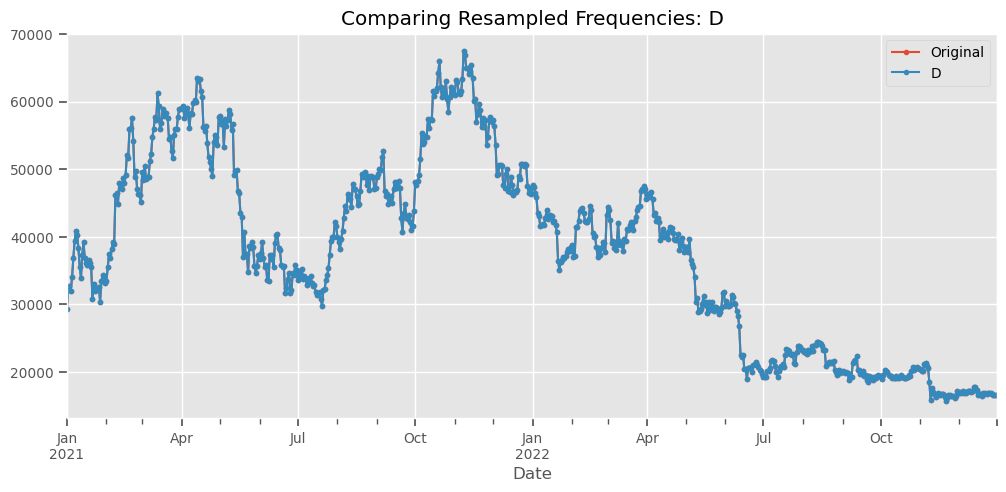

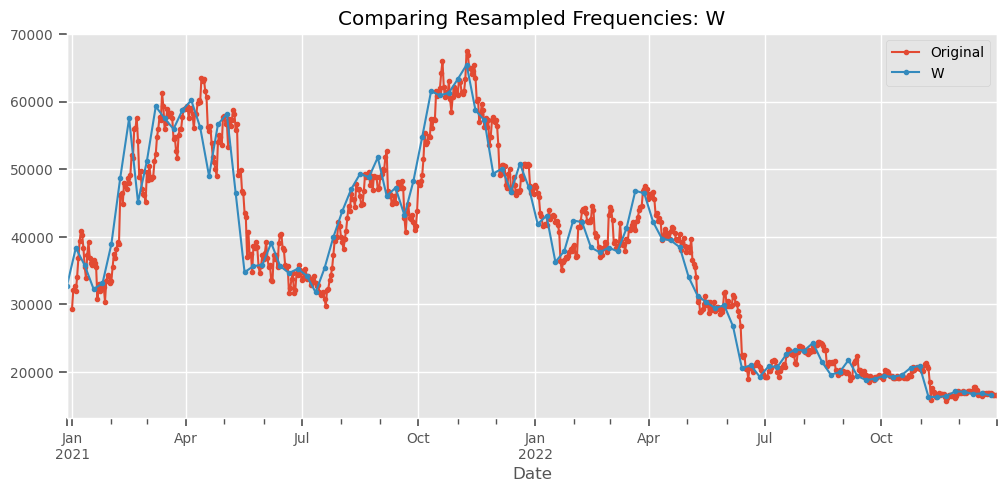

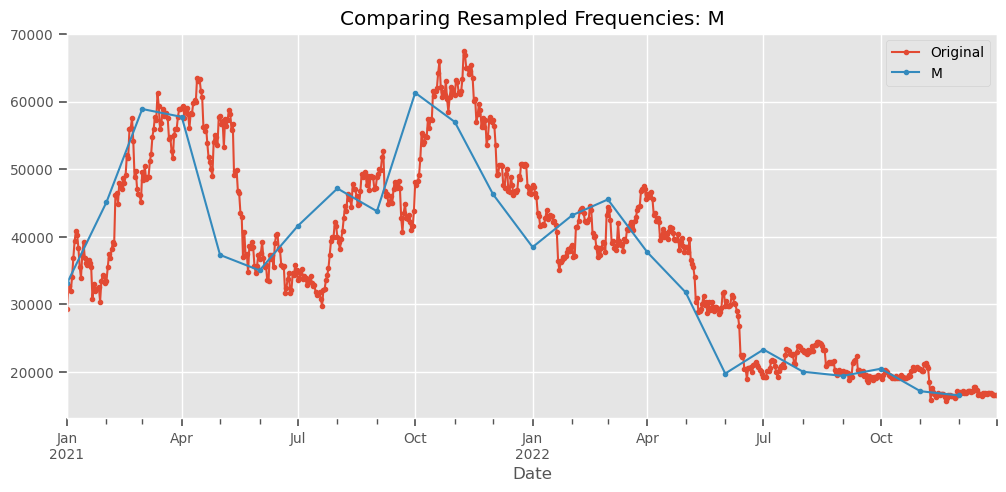

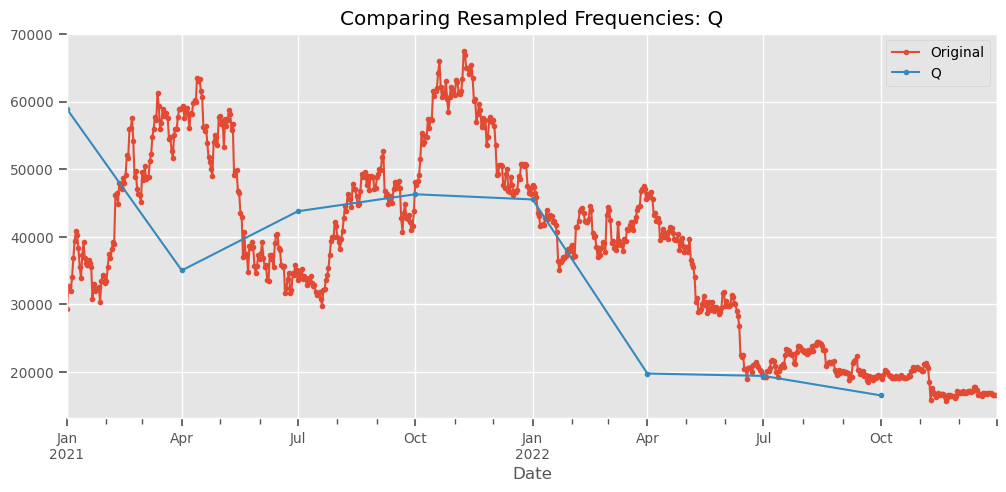

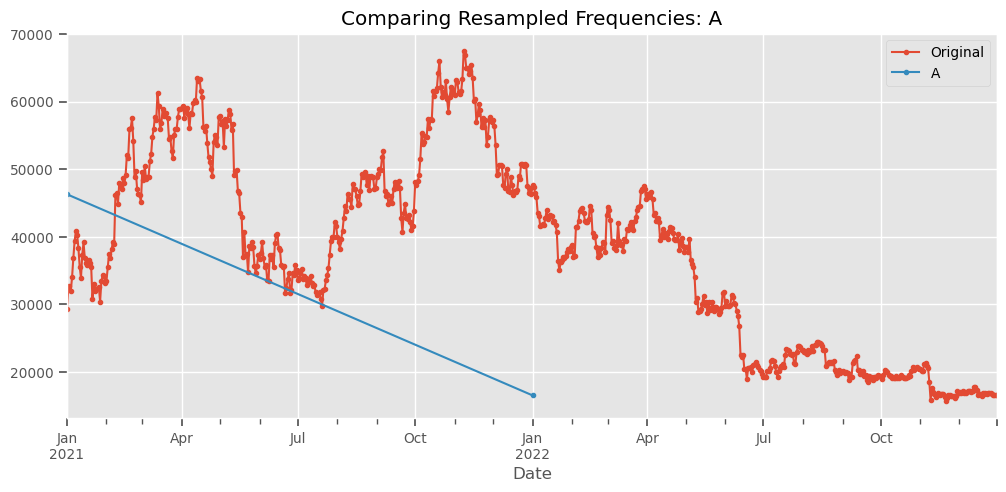

In [42]:
freqs = ['D','W','M','Q','A']


for freq in freqs:
    ax = ts.plot(label='Original',  style='.-',
            title=f'Comparing Resampled Frequencies: {freq}');

    ts_temp = ts.resample(freq).last()
    ts_temp.plot(style='.-', label=freq,ax=ax)
    plt.legend()
    plt.show()

# <font color='blue'> Step 5 </font> Impute as Needed

There are no missing values currently, but let's make some and the impute them.

<Axes: xlabel='Date'>

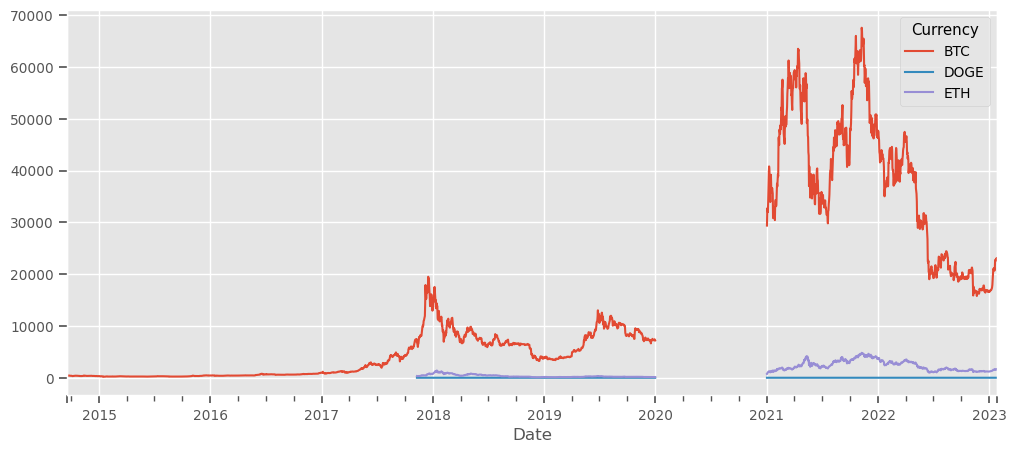

In [43]:
missing = crypto_unstacked.copy()
missing.loc['2020'] = np.nan
missing.plot()

### Forward Fill

<Axes: xlabel='Date'>

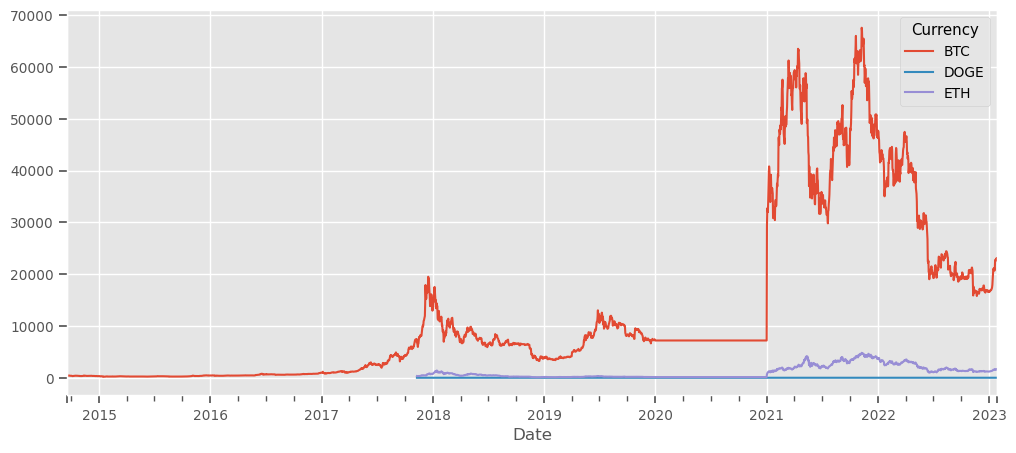

In [44]:
missing_ff = missing.fillna(method='ffill')
missing_ff.plot()

### Back Fill

<Axes: xlabel='Date'>

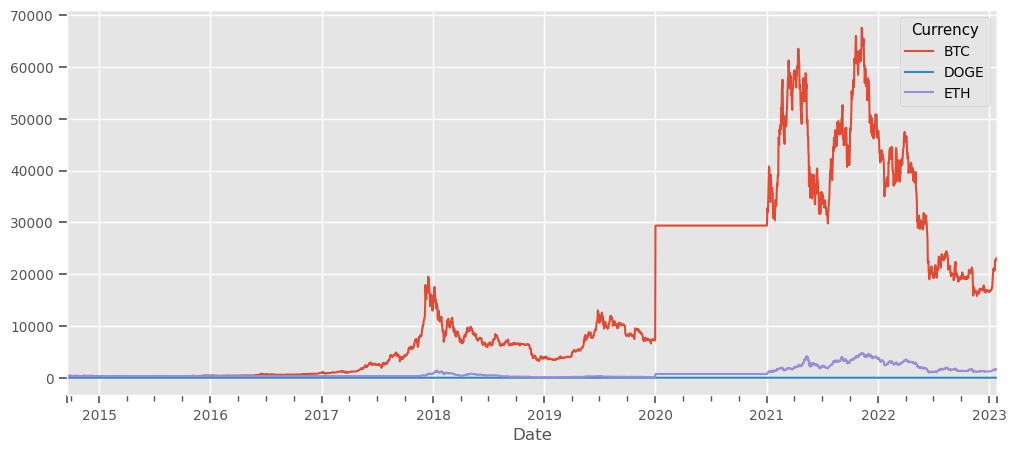

In [45]:
missing_bf = missing.fillna(method='bfill')
missing_bf.plot()

### Interpolate

<Axes: xlabel='Date'>

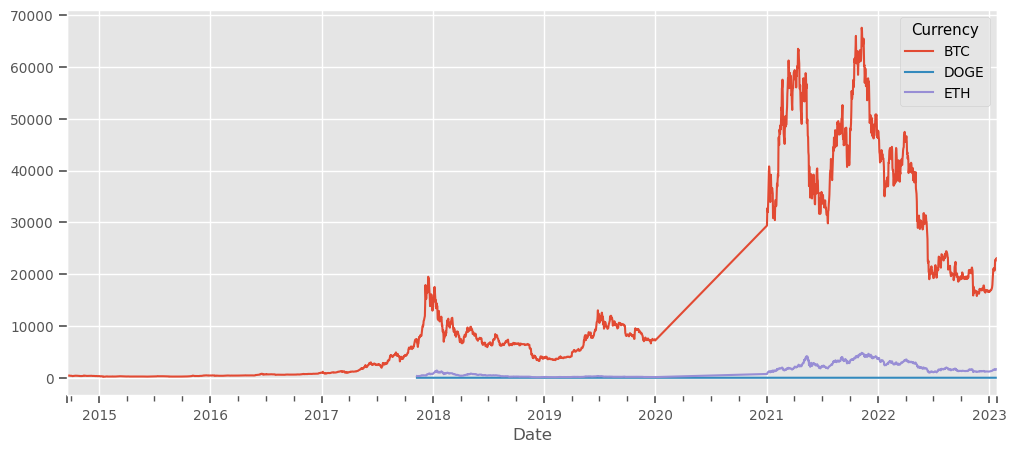

In [46]:
missing_interp = missing.interpolate()
missing_interp.plot()

# Save the processed and unstacked data

In [47]:
import os

## Make a new folder to save data
folder = "Data/FromClass/"
os.makedirs(folder, exist_ok=True)

In [ ]:
## Save the unstacked data
crypto_unstacked.to_csv(folder + 'crypto_currencies.csv')

# Appendix: Using Tick Date Formatters/Locators

- Let's add a minor xtick every 3 months.

In [ ]:
import matplotlib.dates as mdates

In [48]:
## CREATE ARTISTS FOR MAJOR XTICKS (Years)
# Create a year locator
loc_major_yr = mdates.YearLocator()
# Create a year formatter using 4-digit years
fmt_major_yr = mdates.DateFormatter("%Y")


## CREATE ARTISTS FOR MINOR XTICKS ( Months)
# Create a month locator that will add months at 1,4,7,10
loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
# Createa monthnformatter that will use 3-letter month names
fmt_minor_3m = mdates.DateFormatter("%b")

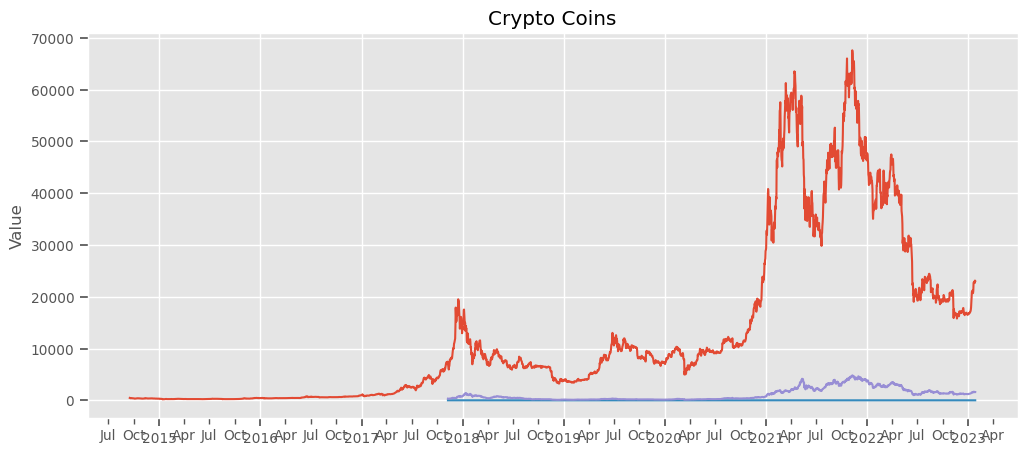

In [49]:
## Create our plot and save the ax
fig, ax = plt.subplots()
ax.plot(crypto_unstacked)

# ax = crypto_unstacked.plot()
ax.set(ylabel="Value", title='Crypto Coins')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)

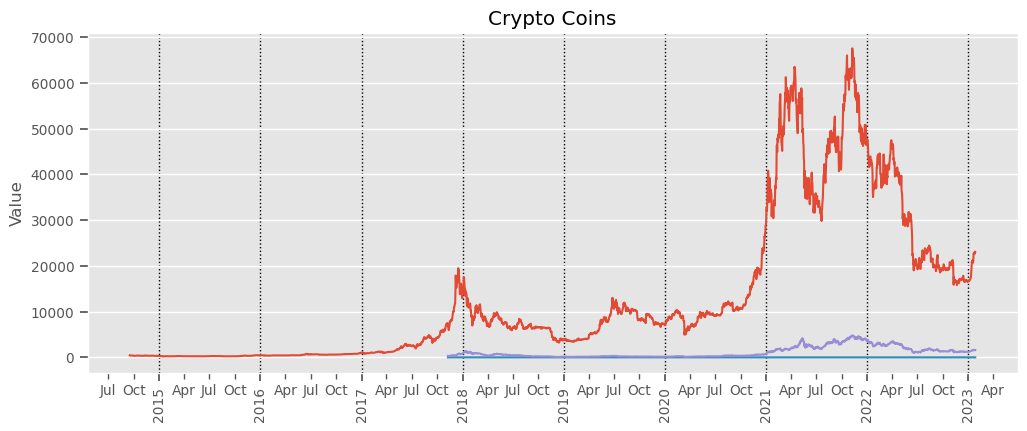

In [50]:
## Create our plot and save the ax
fig, ax = plt.subplots()
ax.plot(crypto_unstacked)

# Set the labels and title
ax.set(ylabel="Value", title='Crypto Coins')

# Set xaxis major locator/formatter
ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)


# Set xaxis minor locator/formatter
ax.xaxis.set_minor_locator(loc_minor_3m)
ax.xaxis.set_minor_formatter(fmt_minor_3m)



# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

In [52]:
def format_xdates(ax):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator()
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Createa monthnformatter that will use 3-letter month names
    fmt_minor_3m = mdates.DateFormatter("%b")
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

    

    # Add gridlines for major xaxis ticks
    ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

    ## Rotate the major tick years using fig.autofmt_xdate
    fig = ax.get_figure()
    fig.autofmt_xdate(which='major', rotation=90,ha='center')
    return fig


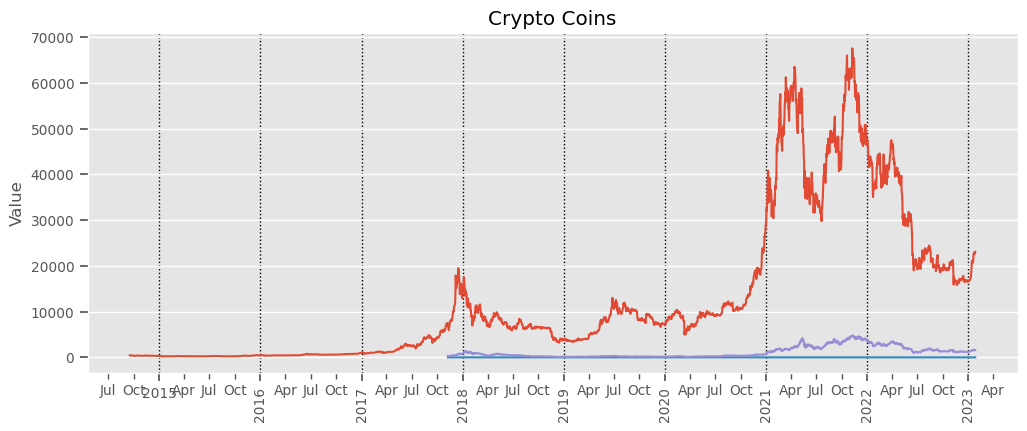

In [53]:
## Create the figure and axis
fig, ax = plt.subplots()

## Format the xticks
format_xdates(ax)
ax.set_title('Crypto Coins')
ax.set_ylabel('Value')
## Plot the data
ax.plot(crypto_unstacked);